# Modeling exercise

## General Instructions

* Submission date: 4.5.2023
* Submission Method: Link to your solution notebook in [this sheet](https://docs.google.com/spreadsheets/d/1GNPESGIhJpPb7LwMAyjF5qpJfZQak_mLkE3i5Y7a_VA/edit?usp=sharing).

In [51]:
pwd

'C:\\Users\\nati.TRANSALGAE\\Python_ML_2023\\Exercises'

In [52]:
import sys; sys.path.append('../src')
import numpy as np
import plotly_express as px

In [53]:
import pandas as pd
import ipywidgets as widgets

In [54]:
from datasets import make_circles_dataframe, make_moons_dataframe

## Fitting and Overfiting 

The goal of the following exercise is to:
* Observe overfitting due to insuffient data
* Observe Overfitting due to overly complex model
* Identify the overfitting point by looking at Train vs Test error dynamic
* Observe how noise levels effect the needed data samples and model capacity

To do so, you'll code an experiment in the first part, and analyze the experiment result in the second part.

### Building an experiment

Code:

1. Create data of size N with noise level of magnitude NL from datasets DS_NAME. 
1. Split it to training and validation data (no need for test set), use 80%-20%. 
1. Use Logistic regression and Choose one complex model of your choice: [KNN](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html), [SVM with RBF kernel](https://scikit-learn.org/stable/modules/svm.html) with different `gamma` values or [Random forest classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) with differnt number of `min_samples_split`. 
1. Train on the train set for different hyper parameter values. compute:
   1. Classification accuracy on the training set (TRE)
   1. Classification accuracy on the validation set (TESTE)
   1. The difference beteen the two above (E_DIFF)
1. Save DS_NAME, N, NL, CLF_NAME, K, TRE, TESTE, E_DIFF and the regularization/hyper param (K, gamma or min_samples_split and regularization value for the linear regression classifier)

Repeat for:
* DS_NAME in Moons, Circles
* N (number of samples) in [5, 10, 50, 100, 1000, 10000]
* NL (noise level) in [0, 0.1, 0.2, 0.3, 0.4, 0.5]
* For the complex model: 10 Values of hyper parameter of the complex model you've chosen.
* For the linear model: 5 values of ridge (l2) regularization - [0.001, 0.01, 0.1, 1, 10, 100, 1000]

In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
import sklearn as skl
log_reg = LogisticRegression(fit_intercept=True, penalty='l2')
cla = log_reg.fit(x_train, y_train)
cla.predict(x_train)

array([1, 1, 0, ..., 0, 1, 0], dtype=int64)

In [99]:
def make_data_frame(name):
    if name == "Circles":
        return make_circles_dataframe(Num,Num_L)
    else:
        return make_moons_dataframe(Num,Num_L)
        

In [342]:
from sklearn.model_selection import train_test_split
# Creating Data of size N 
#data_sets = [make_circles_dataframe(N,NL),make_circles_dataframe(N,NL)] 
DS_NAME = ["Circles","Moons"]
N = [100, 1000, 10000]
NL = [0.01,0.1,0.3,0.5]
clasif_type = ["log_reg","svm"]
k_folds = 3
hp_range = [0.01,0.1,1,10]
regularization_values = [0.01,0.1,1,10]
results_log = pd.DataFrame(columns = ["number","NL","Clf_name","regularization_vlaue","k","type","train_acc","test_acc","DIFF"])
results_svm   = pd.DataFrame(columns = ["number","NL","Clf_name","gamma","C","k","type","train_acc","test_acc","DIFF"])
for name in DS_NAME:
    print(f"working on {name}")
    for Num_L in NL:
            for Num in N:
                ds_4 = make_data_frame(name)
                for K in range(k_folds):
                    features = ["x","y"]
                    class_1 = "label"
                    x_train,x_test,y_train,y_test=train_test_split(ds_4.loc[:,features],ds_4.loc[:,class_1],test_size=0.2,shuffle = True)
                    for clf_type in clasif_type:
                        if clf_type == 'log_reg':
                            for reg_value in regularization_values:
                                log_reg = LogisticRegression(fit_intercept=True, penalty='l2',C = reg_value)
                                train_acc = skl.metrics.accuracy_score(log_reg.fit(x_train, y_train).predict(x_train),y_train)
                                test_acc  = skl.metrics.accuracy_score(log_reg.fit(x_test, y_test).predict(x_test),y_test)
                                results_log.loc[len(results_log.index)] = [Num,Num_L,clf_type,reg_value,K,name,train_acc,test_acc,train_acc-test_acc]                                                
                                #results.append([Num,Num_L,clf_type,K,name,train_acc,test_acc,train_acc-test_acc])
                        if clf_type == 'svm':
                            for gamma in hp_range:
                                for C in regularization_values:
                                    train_acc = skl.metrics.accuracy_score(svm.SVC(kernel = "rbf", gamma = gamma,C = C).fit(x_train, y_train).predict(x_train),y_train)
                                    test_acc  = skl.metrics.accuracy_score(svm.SVC(kernel = "rbf", gamma = gamma,C = C).fit(x_test, y_test).predict(x_test),y_test)
                                    results_svm.loc[len(results_svm.index)] = [Num,Num_L,clf_type,gamma,C,K,name,train_acc,test_acc,train_acc-test_acc]                                                
                                    #results.append([Num,Num_L,clf_type,K,name,train_acc,test_acc,train_acc-test_acc])



working on Circles
working on Moons


In [363]:
### multy processing!!! 
### paralel for with python!
### how to?

In [343]:
results_log.shape , results_svm.shape

((288, 9), (1152, 10))

## creating a function that changes the data with simple math tools such as: 
## (log,**,*,sqrt,etc.)

In [344]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(fit_intercept=True, penalty='none')
log_reg.fit(x_train, y_train)

LogisticRegression(penalty='none')

In [345]:
from sklearn.metrics import accuracy_score
print(log_reg.coef_)
print(log_reg.intercept_[0])
predict=log_reg.predict(x_test)
print("Accuracy score on training set is {}".format(accuracy_score(log_reg.predict(x_train),y_train)))
print("Accuracy score on test set is {}".format(accuracy_score(predict,y_test)))

[[ 1.1586426  -2.05602557]]
-0.0940194461550961
Accuracy score on training set is 0.80175
Accuracy score on test set is 0.81


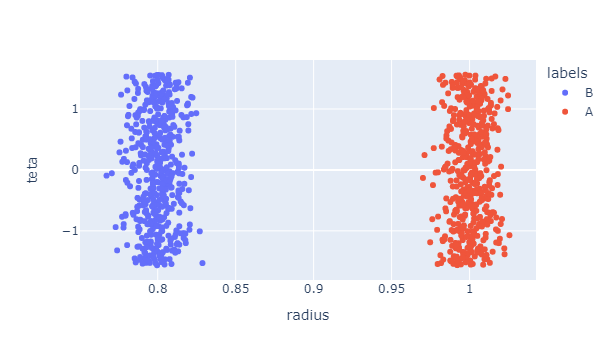

In [346]:
import numpy as np
import math
circles = make_circles_dataframe(1000,0.01)
radius = (circles.x ** 2 + circles.y ** 2).apply(math.sqrt)
teta   =  np.arctan(circles.y/circles.x)
df = pd.DataFrame({"radius" : radius , "teta" : teta , "labels" : circles["label"]})
px.scatter(df,x = "radius" , y = "teta",color = "labels")

### Analysing the expermient results

1. For SVM only, For dataset of size 10k and for each dataset, What are the best model params? How stable is it? 
1. For SVM only, For dataset of size 10k and for each dataset, What is the most stable model and model params? How good is it in comparison to other models? Explain using bias and variance terminoligy.
1. Does regularization help for linear models? consider different datasets sizes. 
1. For a given noise level of your chioce, How does the train, test and difference error changes with increasing data sizes? (answer for svm and LR seperatly)
1. For a given noise level of your chioce, How does the train, test and difference error changes with increasing model complexity? (answer for svm and LR seperatly)
1. Are the noise level effect the number of datapoints needed to reach optimal test results? 

In [347]:
# adding the 2 restults dataframes 
results = results_log.concat(results_svm)

AttributeError: 'DataFrame' object has no attribute 'concat'

In [348]:
results_svm

,number,NL,Clf_name,gamma,C,k,type,train_acc,test_acc,DIFF
0,100,0.01,svm,0.01,0.01,0,Circles,0.525000,0.6000,-0.075000
1,100,0.01,svm,0.01,0.10,0,Circles,0.525000,0.6000,-0.075000
2,100,0.01,svm,0.01,1.00,0,Circles,0.525000,0.6000,-0.075000
3,100,0.01,svm,0.01,10.00,0,Circles,0.525000,0.6000,-0.075000
4,100,0.01,svm,0.10,0.01,0,Circles,0.525000,0.6000,-0.075000
...,...,...,...,...,...,...,...,...,...,...
1147,10000,0.50,svm,1.00,10.00,2,Moons,0.821500,0.8340,-0.012500
1148,10000,0.50,svm,10.00,0.01,2,Moons,0.821000,0.7190,0.102000
1149,10000,0.50,svm,10.00,0.10,2,Moons,0.823750,0.8370,-0.013250
1150,10000,0.50,svm,10.00,1.00,2,Moons,0.823250,0.8390,-0.015750


In [349]:
############## Q1
SVM_10_K = results_svm[(results_svm["number"] == 10000) ]
SVM_10_K.sort_values(["test_acc"],ascending = False)

# # best Hyper parameters are in the first row
# print(SVM_10_K[SVM_10_K["type"] == "Circles"].groupby(["gamma","C"]).mean().sort_values(["test_acc"],ascending = False))
# print(SVM_10_K[SVM_10_K["type"] == "Moons"].groupby(["gamma","C"]).mean().sort_values(["test_acc"],ascending = False))

,number,NL,Clf_name,gamma,C,k,type,train_acc,test_acc,DIFF
141,10000,0.01,svm,10.00,0.10,2,Circles,1.000000,1.0000,0.000000
142,10000,0.01,svm,10.00,1.00,2,Circles,1.000000,1.0000,0.000000
695,10000,0.01,svm,0.10,10.00,1,Moons,1.000000,1.0000,0.000000
697,10000,0.01,svm,1.00,0.10,1,Moons,1.000000,1.0000,0.000000
698,10000,0.01,svm,1.00,1.00,1,Moons,1.000000,1.0000,0.000000
...,...,...,...,...,...,...,...,...,...,...
120,10000,0.01,svm,1.00,0.01,1,Circles,1.000000,0.5005,0.499500
113,10000,0.01,svm,0.01,0.10,1,Circles,0.500125,0.5005,-0.000375
112,10000,0.01,svm,0.01,0.01,1,Circles,0.500125,0.5005,-0.000375
114,10000,0.01,svm,0.01,1.00,1,Circles,0.500125,0.5005,-0.000375


In [350]:
############ Q2
print(SVM_10_K[SVM_10_K["type"] == "Circles"].groupby(["gamma","C"]).mean().sort_values(["test_acc"],ascending = False))
print(SVM_10_K[SVM_10_K["type"] == "Moons"].groupby(["gamma","C"]).mean().sort_values(["test_acc"],ascending = False))

              number      NL    k  train_acc  test_acc      DIFF
gamma C                                                         
10.00 10.00  10000.0  0.2275  1.0   0.769115  0.787167 -0.018052
      1.00   10000.0  0.2275  1.0   0.765490  0.776708 -0.011219
      0.10   10000.0  0.2275  1.0   0.761667  0.768250 -0.006583
1.00  10.00  10000.0  0.2275  1.0   0.760260  0.761875 -0.001615
      1.00   10000.0  0.2275  1.0   0.759917  0.760875 -0.000958
      0.10   10000.0  0.2275  1.0   0.759604  0.759208  0.000396
0.10  10.00  10000.0  0.2275  1.0   0.759354  0.756542  0.002813
      1.00   10000.0  0.2275  1.0   0.758115  0.753542  0.004573
0.01  10.00  10000.0  0.2275  1.0   0.747635  0.560542  0.187094
0.10  0.10   10000.0  0.2275  1.0   0.666615  0.549875  0.116740
1.00  0.01   10000.0  0.2275  1.0   0.758021  0.540250  0.217771
10.00 0.01   10000.0  0.2275  1.0   0.749146  0.520875  0.228271
0.01  1.00   10000.0  0.2275  1.0   0.526865  0.520667  0.006198
      0.01   10000.0  0.2

In [351]:
######## Q3
stats = results_log.groupby(["regularization_vlaue","type"])['test_acc'].agg(['mean', 'count', 'std'])
ci95_hi = []
ci95_lo = []

for i in stats.index:
    m, c, s = stats.loc[i]
    ci95_hi.append(m + 1.96*s/math.sqrt(c))
    ci95_lo.append(m - 1.96*s/math.sqrt(c))

stats["CI"] = (np.array(ci95_hi) - np.array(ci95_lo))
stats["test_acc"] = results_log.groupby(["regularization_vlaue","type"])['test_acc'].mean()                                                 

In [352]:
results_log

,number,NL,Clf_name,regularization_vlaue,k,type,train_acc,test_acc,DIFF
0,100,0.01,log_reg,0.01,0,Circles,0.525000,0.6000,-0.075000
1,100,0.01,log_reg,0.10,0,Circles,0.525000,0.6000,-0.075000
2,100,0.01,log_reg,1.00,0,Circles,0.587500,0.6000,-0.012500
3,100,0.01,log_reg,10.00,0,Circles,0.575000,0.6000,-0.025000
4,100,0.01,log_reg,0.01,1,Circles,0.512500,0.5500,-0.037500
...,...,...,...,...,...,...,...,...,...
283,10000,0.50,log_reg,10.00,1,Moons,0.802125,0.8070,-0.004875
284,10000,0.50,log_reg,0.01,2,Moons,0.801375,0.8060,-0.004625
285,10000,0.50,log_reg,0.10,2,Moons,0.801000,0.8100,-0.009000
286,10000,0.50,log_reg,1.00,2,Moons,0.801625,0.8105,-0.008875


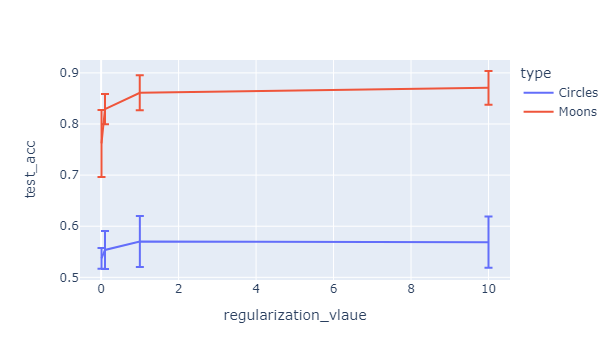

In [353]:

stats = stats.reset_index()
px.line(stats,x = "regularization_vlaue",y = "test_acc",color = "type", error_y = "CI")

## for moons there seems to be a positive change with increase of reg_num
## for Circles there is no detectable change

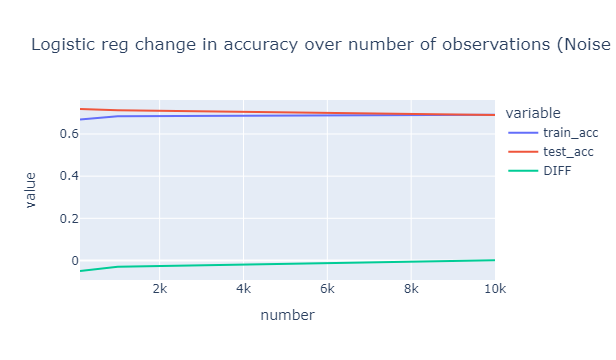

In [354]:
########### Q4
by_noise = results_log.groupby(["number","NL"]).mean()
by_noise = by_noise.reset_index() 
px.line(by_noise.query("NL == 0.1"),x = "number", y = ["train_acc","test_acc","DIFF"],title = "Logistic reg change in accuracy over number of observations (Noise Level 0.1)")

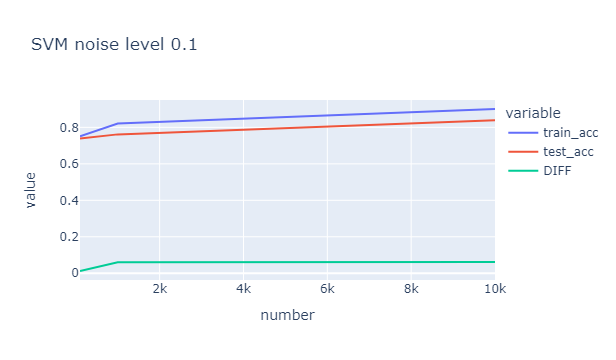

In [355]:
by_noise = results_svm.groupby(["number","NL"]).mean()
by_noise = by_noise.reset_index() 
px.line(by_noise.query("NL == 0.01"),x = "number", y = ["train_acc","test_acc","DIFF"],title = "SVM noise level 0.1")

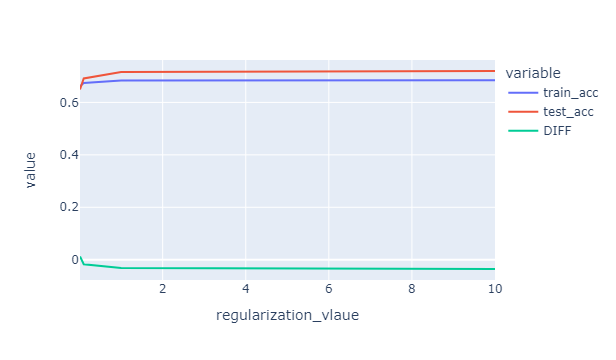

In [356]:
######### Q5
by_noise = results_log.groupby(["regularization_vlaue"]).mean()
by_noise = by_noise.reset_index()
px.line(by_noise,x = "regularization_vlaue", y = ["train_acc","test_acc","DIFF"])

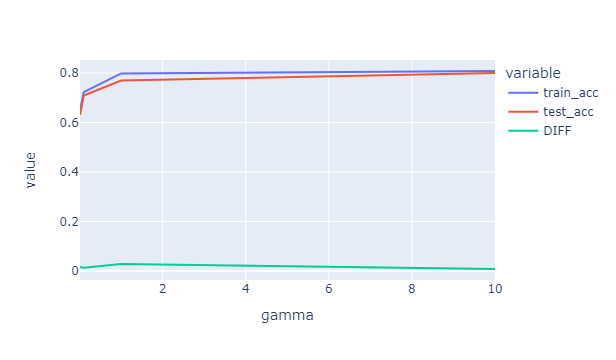

In [357]:
by_noise = results_svm.groupby(["gamma"]).mean()
by_noise = by_noise.reset_index()
px.line(by_noise,x = "gamma", y = ["train_acc","test_acc","DIFF"])

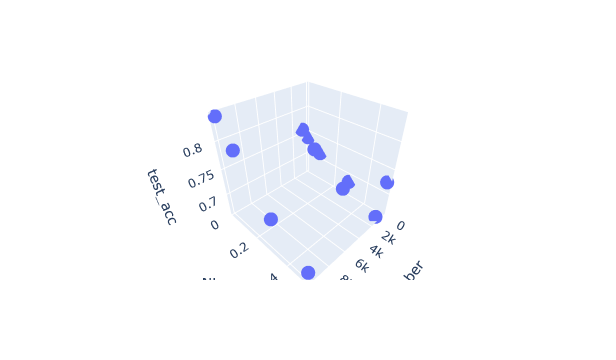

In [358]:
########### Q6
by_noise = results_svm.groupby(["number","NL"]).mean()
by_noise = by_noise.reset_index()
px.scatter_3d(by_noise,x = "number",y = "NL", z = "test_acc")

Bonus:

* For SVM: Select one dataset and with 0.2 noise level. Identify the optimal model params, and visualize the decision boundry learned. 
  * Hint: Use a grid. See classification models notebook 

In [359]:
data = make_circles_dataframe(1000,0.1)
svm_clf = svm.SVC(kernel='rbf',gamma=100, C = 1) # kernels availble: 'linear', 'poly', 'rbf'
svm_clf.fit(data[['x','y']], data['label'])

SVC(C=1, gamma=100)

In [360]:
data['predicted_class'] = svm_clf.predict(data[['x','y']])
data[['prob_A','prob_B']] = svm_clf.predict_proba(data[['x','y']])


AttributeError: predict_proba is not available when  probability=False

In [ ]:
import plotly.express as px
import pandas as pd
import numpy as np
import math

def load_and_plot(path):
    data = pd.read_csv(path)
    if 'decision_boundry' in data.columns:
        return data, plot_data_with_decsion_boundry(data, 'decision_boundry')
    else:
        fig = px.scatter(data, x='x',y='y',color='class_id', template='plotly_white', height=600).update_traces(marker=dict(size=12, line=dict(width=2, color='DarkSlateGrey')), selector=dict(mode='markers'))
    return data, fig

def plot_data_with_decsion_boundry(data, decision_boundry_col, class_col = 'class_id', title='None', line_legened='Decision Boundry', update_markers = True, marker_size=12, line_width=2):
    a_data = data[data[class_col] == 'A']
    b_data = data[data[class_col] == 'B']
    fig = px.line(data.sort_values(by='x'), x='x', y=decision_boundry_col, color=px.Constant(line_legened), template='plotly_white').update_traces(line=dict(color="DarkSlateGrey", width=3))
    fig = fig.add_scatter(x=a_data.x, y=a_data.y, mode='markers', name='Class A')
    if update_markers:
        fig = fig.update_traces(marker=dict(size=marker_size, line=dict(width=line_width, color='DarkSlateGrey')), selector=dict(mode='markers'))
    fig = fig.add_scatter(x=b_data.x, y=b_data.y, mode='markers', name='Class B')
    if update_markers:
        fig = fig.update_traces(marker=dict(size=marker_size, line=dict(width=line_width, color='DarkSlateGrey')), selector=dict(mode='markers'))
    if title:
        fig.update_layout(title_text=title, title_x=0.5)
    return fig


def plot_sigmoid_function():
    def sigmoid(x):
        a = []
        for item in x:
            a.append(1/(1+math.exp(-item)))
        return a
    
    x = np.arange(-10., 10., 0.2)
    sig = sigmoid(x)
    fig = px.line(pd.DataFrame({'x': x, 'sig': sig}), x='x', y='sig', template='plotly_white')
    fig.update_traces(line=dict(color="#00CC96", width=3))
    fig.update_layout(title_text='Sigmoid function', title_x=0.5)
    return fig

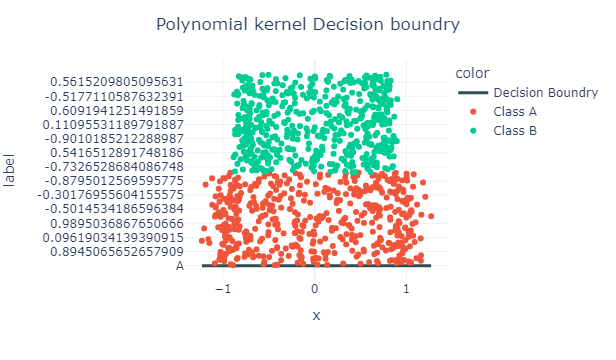

In [361]:
data['poly_svm_prediction'] = svm_clf.predict(data[['x','y']])
plot_data_with_decsion_boundry(data, decision_boundry_col='label', class_col= f'poly_svm_prediction', 
                               title = f'Polynomial kernel Decision boundry', update_markers=False)

In [ ]:
data

## Tips and Hints

For buliding the experiment:

* Start with one dataframe holding all the data for both datastes with different noise level. Use the `make_<dataset_name>_dataframe()` functions below, and add two columns, dataset_name and noise_level, before appending the new dataset to the rest of the datasets. Use `df = pd.DataFrame()` to start with an empty dataframe and using a loop, add data to it using `df = df.append(<the needed df here>)`. Verify that you have 10k samples for each dataset type and noise level by a proper `.value_counts()`. You can modify the 
* When you'll need an N samples data with a specific noise level, use `query()` and `head(n)` to get the needed dataset. 
* Use sklearn `train_test_split()` method to split the data with `test_size` and `random_state` parameters set correctly to ensure you are always splitting the data the same why for a given fold `k`. Read [the docs](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) if needed. 
* You can also not create your own data splitter, and instead use `model_selection.cross_validate()` from sklearn. You'll need to ask for the train erros as well as the test errors, see [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html).
* Use prints in proper location to ensure the progress of the experiment. 

**If you get stuck, and need refernce, scroll to the end of the notebook to see more hints!**

## Moons dataset

In [12]:
from sklearn.datasets import make_moons

In [13]:
moons_df = make_moons_dataframe(n_samples=1000, noise_level=0.1)
moons_df.head()

,x,y,label
0,0.552235,0.831124,A
1,0.828307,-0.527616,B
2,1.721499,-0.049019,B
3,0.450451,0.827117,A
4,0.099954,0.961871,A


In [102]:
@widgets.interact
def plot_noisy_moons(noise_level = widgets.FloatSlider(value=0, min=0, max=0.5, step=0.05)):
    moons_df = make_moons_dataframe(n_samples=1000, noise_level=noise_level)
    return px.scatter(moons_df, x='x', y='y', color = 'label')

interactive(children=(FloatSlider(value=0.0, description='noise_level', max=0.5, step=0.05), Output()), _dom_c…

## Circles Dataset

In [15]:
circles_df = make_circles_dataframe(n_samples=500, noise_level=0)
circles_df.head()

,x,y,label
0,-0.070281,0.796907,B
1,-0.701045,-0.385403,B
2,0.763892,0.237633,B
3,0.332820,-0.942991,A
4,-0.691139,0.402899,B


In [103]:
@widgets.interact
def plot_noisy_circles(noise_level = widgets.FloatSlider(value=0, min=0, max=0.5, step=0.05)):
    df = make_circles_dataframe(1000, noise_level)
    return px.scatter(df, x='x', y='y', color = 'label')

interactive(children=(FloatSlider(value=0.0, description='noise_level', max=0.5, step=0.05), Output()), _dom_c…

## Appendix

### More hints!

If you'll build the datasets dataframe correctly, you'll have **one** dataframe that has dataset_name and noise_level colmuns, as well as the regular x,y,label colmns. To unsure you've appended everything correctly, groupby the proper colmuns and look at the size:

In [17]:
# Use proper groupby statement to ensure the datasets dataframe contains data as expected. You should see the following result:

Your 

You experiment code should look something like that:

In [19]:
datasets = 
datasets_type = ['circles', 'moons']
k_folds = 10
n_samples = [10, 50, 100, 1000, 10000]
noise_levels = [0, 0.1, 0.2, 0.3, 0.4, 0.5]
clf_types = ['log_reg', 'svm']
hp_range = [0.001,0.01,0.1,0.5,1,10,100]
regularization_values = [0.001,0.01,0.1,0.5,1,10,100]
results = []
for ds_type in datasets_type:
    print(f'Working on {ds_type}')
    for nl in noise_levels:
        for n in n_samples:
            ds = datasets.query(<'your query here'>).head(n)
            print(f'Starting {k_folds}-fold cross validation for {ds_type} datasets with {n} samples and noise level {nl}. Going to train {clf_types} classifiers.')
            for k in range(k_folds):
                X, Y = <'Your code here'>
                x_train,x_test,y_train,y_test= <'Your code here'>
                for clf_type in clf_types:
                    if clf_type == 'log_reg':
                        for regularization_value in regularization_values:
                            train_acc, test_acc = <'Your code here'>
                            results.append(<'Your code here'>)
                    if clf_type == 'svm':
                        for gamma in hp_range:
                            train_acc, test_acc = <'Your code here'>
                            results.append(<'Your code here'>)

In [129]:
log_reg.fit(x_train, y_train)

LogisticRegression(penalty='none')

In [155]:
results.loc[len(df.index)] = [Num,Num_L,clf_type,K,name,train_acc,test_acc]

NameError: name 'clf_type' is not defined

In [160]:
results = pd.DataFrame(columns = ["number","NL","Clf_name","k","type","train_acc","test_acc"])
results.loc[len(df.index)] = [Num,Num_L,clf_type,K,name,train_acc,test_acc]                                                
results

NameError: name 'clf_type' is not defined